In [49]:
import matplotlib.pyplot as plt
import lumicks.pylake as lk
import numpy as np
%matplotlib widget
file = lk.File('D:\\Sun Lab\\data\\D-Trap\\20241129 lambda DNA+0.1 0.5 1 5 10 nM TEAD4\\20241129-211202 C2 lambda DNA C4 5 nM TEAD4 C3 buffer Kymograph 24.h5')
#print(file)

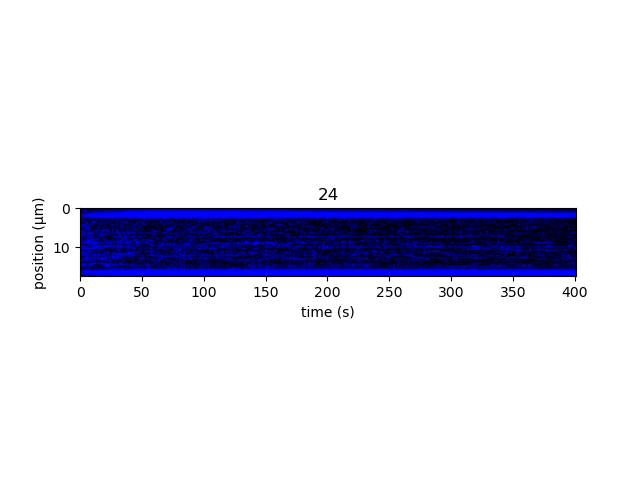

In [50]:
kymo = file.kymos['24']
plt.figure()
kymo.plot(adjustment=lk.ColorAdjustment([0, 0, 0], [100000, 200000, 30]))

122.4


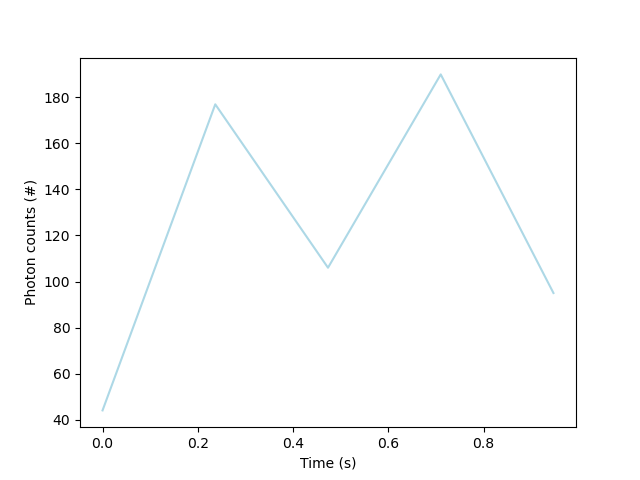

In [64]:
#Intensity along binding event
kymo_selection = kymo["232.3s":"233.3s"].crop_by_distance(4.71, 5.2)
photon_counts = kymo_selection.get_image("blue")
sum_photon_counts = np.sum(photon_counts, axis = 0)
x = np.arange(len(sum_photon_counts))*kymo.line_time_seconds
plt.figure()
plt.plot(x, sum_photon_counts, 'lightblue')
plt.ylabel('Photon counts (#)')
plt.xlabel('Time (s)')
average_phton_counts = np.mean(sum_photon_counts)
print (average_phton_counts)

In [27]:
#data of Intensity along binding event
data = np.concatenate(([x],[sum_photon_counts]),axis=0).T
np.savetxt('D:\\Sun Lab\\TEAD4 fig 素材\\C-Trap\\TEAD4 荧光随时间变化 （多聚在溶液中）\\0.1-10.txt', data, delimiter = ',')

In [54]:
#算tracks光子数/pixel
kymo_selection = kymo["11s":"19s"].crop_by_distance(10.07, 10.72)
photon_counts = kymo_selection.get_image("blue")
sum_photon_counts = np.sum(photon_counts, axis = 0)
average_phton_counts = np.mean(sum_photon_counts)
print (average_phton_counts)

23.38235294117647


# Compute and plot intensity along DNA
top_bead_edge = 3
bottom_bead_edge = 15
kymo_cropped = kymo.crop_by_distance(top_bead_edge, bottom_bead_edge) 
plt.figure()
kymo_cropped.plot_with_position_histogram(color_channel='blue',adjustment=lk.ColorAdjustment([0, 0, 0], [10, 10, 10]))
image_green = kymo_cropped.get_image("blue")
profile = np.sum(image_green, axis = 1)
profile_coordinates_um = kymo.pixelsize_um*np.arange(len(profile))
plt.figure()
plt.plot(profile_coordinates_um, profile, color = 'lightgreen')
plt.ylabel('Summed intensity (photon counts)')
plt.xlabel('Position ($\mu$m)')
plt.title('Binding profile')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\shanghaitech\AppData\Local\Temp\ipykernel_3876\2368489358.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Position ($\mu$m)')


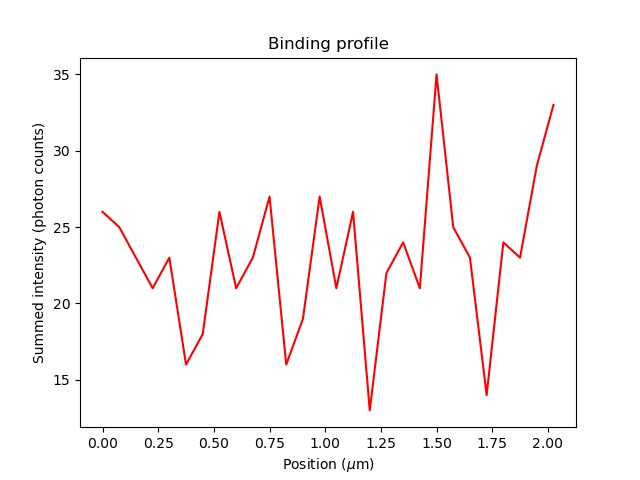

In [189]:
#Compute and plot intensity along DNA
kymo_selection = kymo["88.4s":"95.2s"].crop_by_distance(10.3,12.3)
image_blue = kymo_selection.get_image("blue")
profile = np.sum(image_blue, axis = 1)
profile_coordinates_um = kymo.pixelsize_um*np.arange(len(profile))
plt.figure()
plt.plot(profile_coordinates_um, profile, color = 'red')
plt.ylabel('Summed intensity (photon counts)')
plt.xlabel('Position ($\mu$m)')
plt.title('Binding profile')
plt.show()

In [190]:
#Compute and plot intensity along DNA导出TXT
data = np.concatenate(([profile_coordinates_um],[profile]),axis=0).T
np.savetxt('D:\\Sun Lab\\data\\D-Trap\\20241129 lambda DNA+0.1 0.5 1 5 10 nM TEAD4\\20241030-1-21-B.txt', data, delimiter = ',')

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\shanghaitech\AppData\Local\Temp\ipykernel_27972\1015437442.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('coodinate ($\mu$m)')


Text(0.5, 1.0, 'Intensity profile over time')

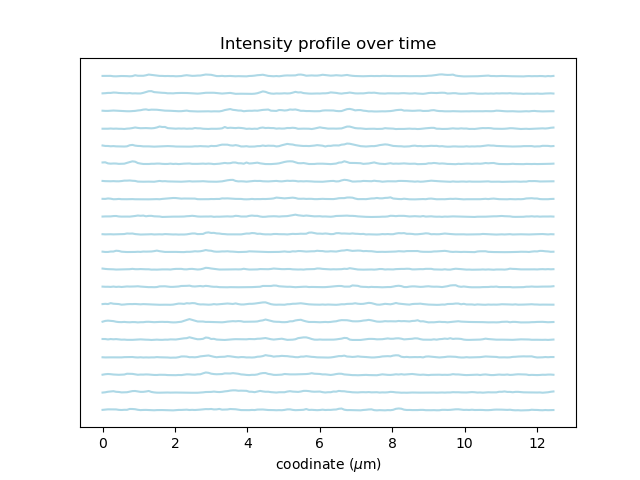

In [26]:
#Intensity profiles over time
kymo_cropped = kymo["60s":"60s"].crop_by_distance(4.23, 16.67)
kymo_downs = kymo_cropped.downsampled_by(time_factor=10)
image_blue = kymo_downs.get_image("blue")
plt.figure()
data = len(image_blue[::,0])*kymo.pixelsize_um
for i in np.arange(image_blue.shape[1]):
    plt.plot(np.arange(len(image_blue[::,i]))*kymo.pixelsize_um,image_blue[::,i]+1000*i, 'lightblue')
    data = np.append(data,image_blue[::,i]+1000*i,axis=0).T
plt.yticks([])
plt.xlabel('coodinate ($\mu$m)')
plt.title('Intensity profile over time')

In [27]:
#Intensity profiles over time导出TXT
np.savetxt('D:\\Sun Lab\data\\D-Trap\\TEAD4 kymo concentrations\\TXT\\intensity over time\\1 nM-20240904-8.txt', data, delimiter = ',')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shanghaitech\AppData\Local\Temp\ipykernel_27972\2642990395.py:2: SyntaxWarning: invalid escape sequence '\d'
  np.savetxt('D:\\Sun Lab\data\\D-Trap\\TEAD4 kymo concentrations\\TXT\\intensity over time\\1 nM-20240904-8.txt', data, delimiter = ',')


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\shanghaitech\AppData\Local\Temp\ipykernel_70872\3633180058.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('coodinate ($\mu$m)')


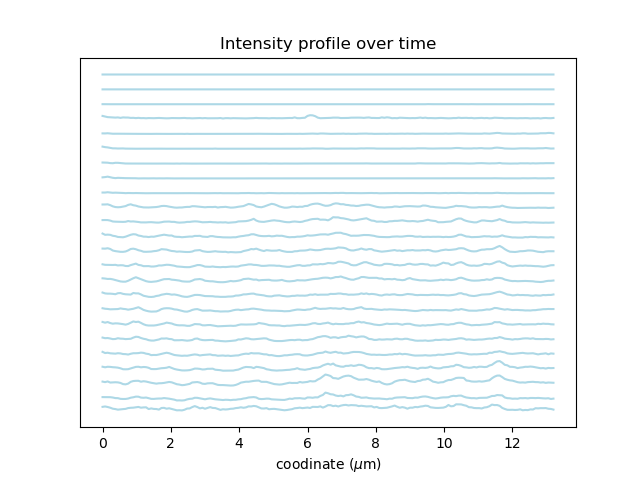

In [60]:
#Intensity profiles over time
kymo_cropped = kymo["20s":"70s"].crop_by_distance(3.33, 16.53) 
kymo_downs = kymo_cropped.downsampled_by(time_factor=20)
image_blue = kymo_downs.get_image("blue")
plt.figure()
for i in np.arange(image_blue.shape[1]):
    plt.plot(np.arange(len(image_blue[::,i]))*kymo.pixelsize_um,image_blue[::,i]+1000*i, 'lightblue')
    data = np.concatenate(([np.arange(len(image_blue[::,i]))*kymo.pixelsize_um],[image_blue[::,i]+1000*i]),axis=0).T
plt.yticks([])
plt.xlabel('coodinate ($\mu$m)')
plt.title('Intensity profile over time')
np.savetxt('1.txt', data, delimiter = ',')

In [10]:
#Compute and plot intensity along DNA导出TXT
print (np.arange(len(image_blue[::,i]))*kymo.pixelsize_um)
data = np.concatenate(([np.arange(len(image_blue[::,i]))*kymo.pixelsize_um],[image_blue[::,i]+1000*i]),axis=0).T
np.savetxt('1.txt', data, delimiter = ',')

[ 0.     0.075  0.15   0.225  0.3    0.375  0.45   0.525  0.6    0.675
  0.75   0.825  0.9    0.975  1.05   1.125  1.2    1.275  1.35   1.425
  1.5    1.575  1.65   1.725  1.8    1.875  1.95   2.025  2.1    2.175
  2.25   2.325  2.4    2.475  2.55   2.625  2.7    2.775  2.85   2.925
  3.     3.075  3.15   3.225  3.3    3.375  3.45   3.525  3.6    3.675
  3.75   3.825  3.9    3.975  4.05   4.125  4.2    4.275  4.35   4.425
  4.5    4.575  4.65   4.725  4.8    4.875  4.95   5.025  5.1    5.175
  5.25   5.325  5.4    5.475  5.55   5.625  5.7    5.775  5.85   5.925
  6.     6.075  6.15   6.225  6.3    6.375  6.45   6.525  6.6    6.675
  6.75   6.825  6.9    6.975  7.05   7.125  7.2    7.275  7.35   7.425
  7.5    7.575  7.65   7.725  7.8    7.875  7.95   8.025  8.1    8.175
  8.25   8.325  8.4    8.475  8.55   8.625  8.7    8.775  8.85   8.925
  9.     9.075  9.15   9.225  9.3    9.375  9.45   9.525  9.6    9.675
  9.75   9.825  9.9    9.975 10.05  10.125 10.2   10.275 10.35  10.425
 10.5 